#### Clean the data

In [3]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_sale_202210_202410.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify removal of duplicates
data.info()

# Save the cleaned data to a new CSV file
new_file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data.to_csv(new_file_path, index=False, encoding='utf-8')

print("Duplicates removed and cleaned data saved to a new CSV file successfully.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56830033 entries, 0 to 64865518
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   union_id             int64 
 1   gender               object
 2   race                 object
 3   season               object
 4   style_new            object
 5   root_category        object
 6   category             object
 7   kid_category         object
 8   collar               object
 9   sleeve               object
 10  sleeve_type          object
 11  fabric               object
 12  contour              object
 13  clothes_age          object
 14  clothes_length       object
 15  texture              object
 16  accessories          object
 17  technology_new       object
 18  color                object
 19  item_id              int64 
 20  shop_id              int64 
 21  sale_time            object
 22  cprice               int64 
 23  day_30_sales_volume  int64 
 24  pt                   i

In [4]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Count total rows in the dataset
total_rows_count = data.shape[0]

# Display the result
print("Total rows:", total_rows_count)

# Count distinct rows by considering all columns (to ensure row uniqueness)
distinct_rows_count = data.drop_duplicates().shape[0]

# Count distinct values in the 'union_id' column
distinct_union_id_count = data['union_id'].nunique()

# Count distinct values in the 'item_id' column
distinct_item_id_count = data['item_id'].nunique()

# Display the results
print("Distinct rows:", distinct_rows_count)
print("Distinct union_id values:", distinct_union_id_count)
print("Distinct item_id values:", distinct_item_id_count)

# Count distinct values in the 'style_new' column
distinct_style_new_count = data['style_new'].nunique()

# Display the result
print("Distinct style_new values:", distinct_style_new_count)

Total rows: 56830033
Distinct rows: 56830033
Distinct union_id values: 13845293
Distinct item_id values: 13845293
Distinct style_new values: 6017


#### Check styles
1. Clusters the data by style_new.
2. Counts the unique union_id and item_id values for each style.
3. Sorts the styles by the count of item_id and selects the top 10 styles.
4. Visualizes the results in a bar chart.

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

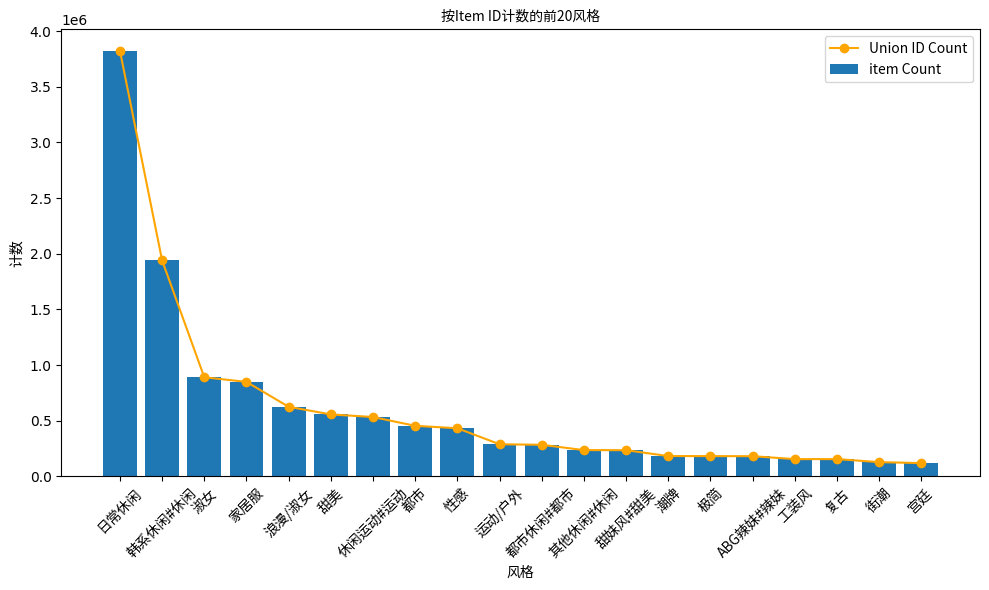

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# Set up the font properties for Chinese text
chinese_font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
chinese_font = FontProperties(fname=chinese_font_path)
mpl.rcParams['font.sans-serif'] = [chinese_font_path]  # Set default font for matplotlib
mpl.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly

# Group by 'style_new' and count unique 'union_id' and 'item_id' for each style
style_counts = data.groupby('style_new').agg(
    unique_union_id_count=('union_id', 'nunique'),
    item_id_count=('item_id', 'nunique')
).reset_index()

# Sort by 'item_id_count' to get the top 20 styles
top_10_styles = style_counts.sort_values(by='item_id_count', ascending=False).head(20)

# Plotting the top 20 styles
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_styles['style_new'], top_10_styles['item_id_count'], label='item Count')
ax.plot(top_10_styles['style_new'], top_10_styles['unique_union_id_count'], color='orange', marker='o', label='Union ID Count')

# Add labels and legend with Chinese font support
ax.set_xlabel('风格', fontproperties=chinese_font)  # 'Style' in Chinese
ax.set_ylabel('计数', fontproperties=chinese_font)  # 'Count' in Chinese
ax.set_title('按Item ID计数的前20风格', fontproperties=chinese_font)  # 'Top 20 Styles by item ID Count' in Chinese
ax.legend(prop=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
# Display the results in a table format
top_10_styles.columns = ['Style', 'Union ID Count', 'Item ID Count']
print(top_10_styles)

         Style  Union ID Count  Item ID Count
2244      日常休闲         3824154        3824154
5809   韩系休闲#休闲         1940942        1940942
4223        淑女          890888         890888
1436       家居服          849363         849363
4095     浪漫/淑女          625782         625782
4858        甜美          557298         557298
464    休闲运动#运动          533864         533864
5544        都市          454937         454937
2005        性感          433092         433092
5524     运动/户外          289331         289331
5683   都市休闲#都市          284587         284587
595    其他休闲#休闲          236970         236970
4722    甜妹风#甜美          236012         236012
4453        潮牌          183345         183345
3488        极简          182888         182888
59    ABG辣妹#辣妹          182009         182009
1779       工装风          155975         155975
1110        复古          155925         155925
5480        街潮          128812         128812
1299        宫廷          120123         120123


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载数据
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 定义特征列和筛选前5个 style
columns_to_check = [
    'gender', 'race', 'season', 'root_category', 'category', 'kid_category', 
    'collar', 'sleeve', 'sleeve_type', 'fabric', 'contour', 'clothes_age', 
    'clothes_length', 'texture', 'accessories', 'technology_new', 'color'
]
top_5_styles = data.groupby('style_new')['union_id'].nunique().nlargest(5).index
top_5_data = data[data['style_new'].isin(top_5_styles)]

# 加载中文字体
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# 为每个 style 生成子图
for style in top_5_styles:
    style_data = top_5_data[top_5_data['style_new'] == style]
    print(f"\n生成 {style} 的特征分布图")
    
    # 设置子图布局：每行 3 个图，最后一行 2 个图
    fig, axes = plt.subplots(6, 3, figsize=(18, 24))  # 总共 17 个特征
    fig.suptitle(f'Feature Distributions for Style: {style}', fontproperties=chinese_font, fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(columns_to_check):
        # 计算每个特征的 union_id 分布，按计数降序排列
        feature_distribution = style_data.groupby(col)['union_id'].nunique().nlargest(10)
        
        # 按计数降序排列绘制横向条形图，使多数类别在顶部
        axes[i].barh(feature_distribution.index[::-1], feature_distribution.values[::-1], color='skyblue')
        axes[i].set_title(f'{col} Distribution', fontproperties=chinese_font, fontsize=12)
        axes[i].set_xlabel('Union ID Count', fontproperties=chinese_font)
        axes[i].tick_params(axis='y', labelsize=10)
        
        # 设置 y 轴标签字体为中文字体
        for label in axes[i].get_yticklabels():
            label.set_fontproperties(chinese_font)

    # 移除多余的空白子图
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 布局调整并显示图表
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 留出顶部标题的空间
    plt.show()


#### Check the trend
1. 去重处理：我们按 item_id、day_30_sales_volume 和 sale_month 进行去重，以确保每个组合在每个月只有一个唯一条目。
2. 按前 5 风格筛选：基于 union_id 的唯一数量，找到前 5 个风格。
3. 按月份聚合：对每个 style_new 和 sale_month 计算 day_30_sales_volume 的总和。
4. 绘制趋势图：绘制前 5 个风格的销售随月份的变化趋势。

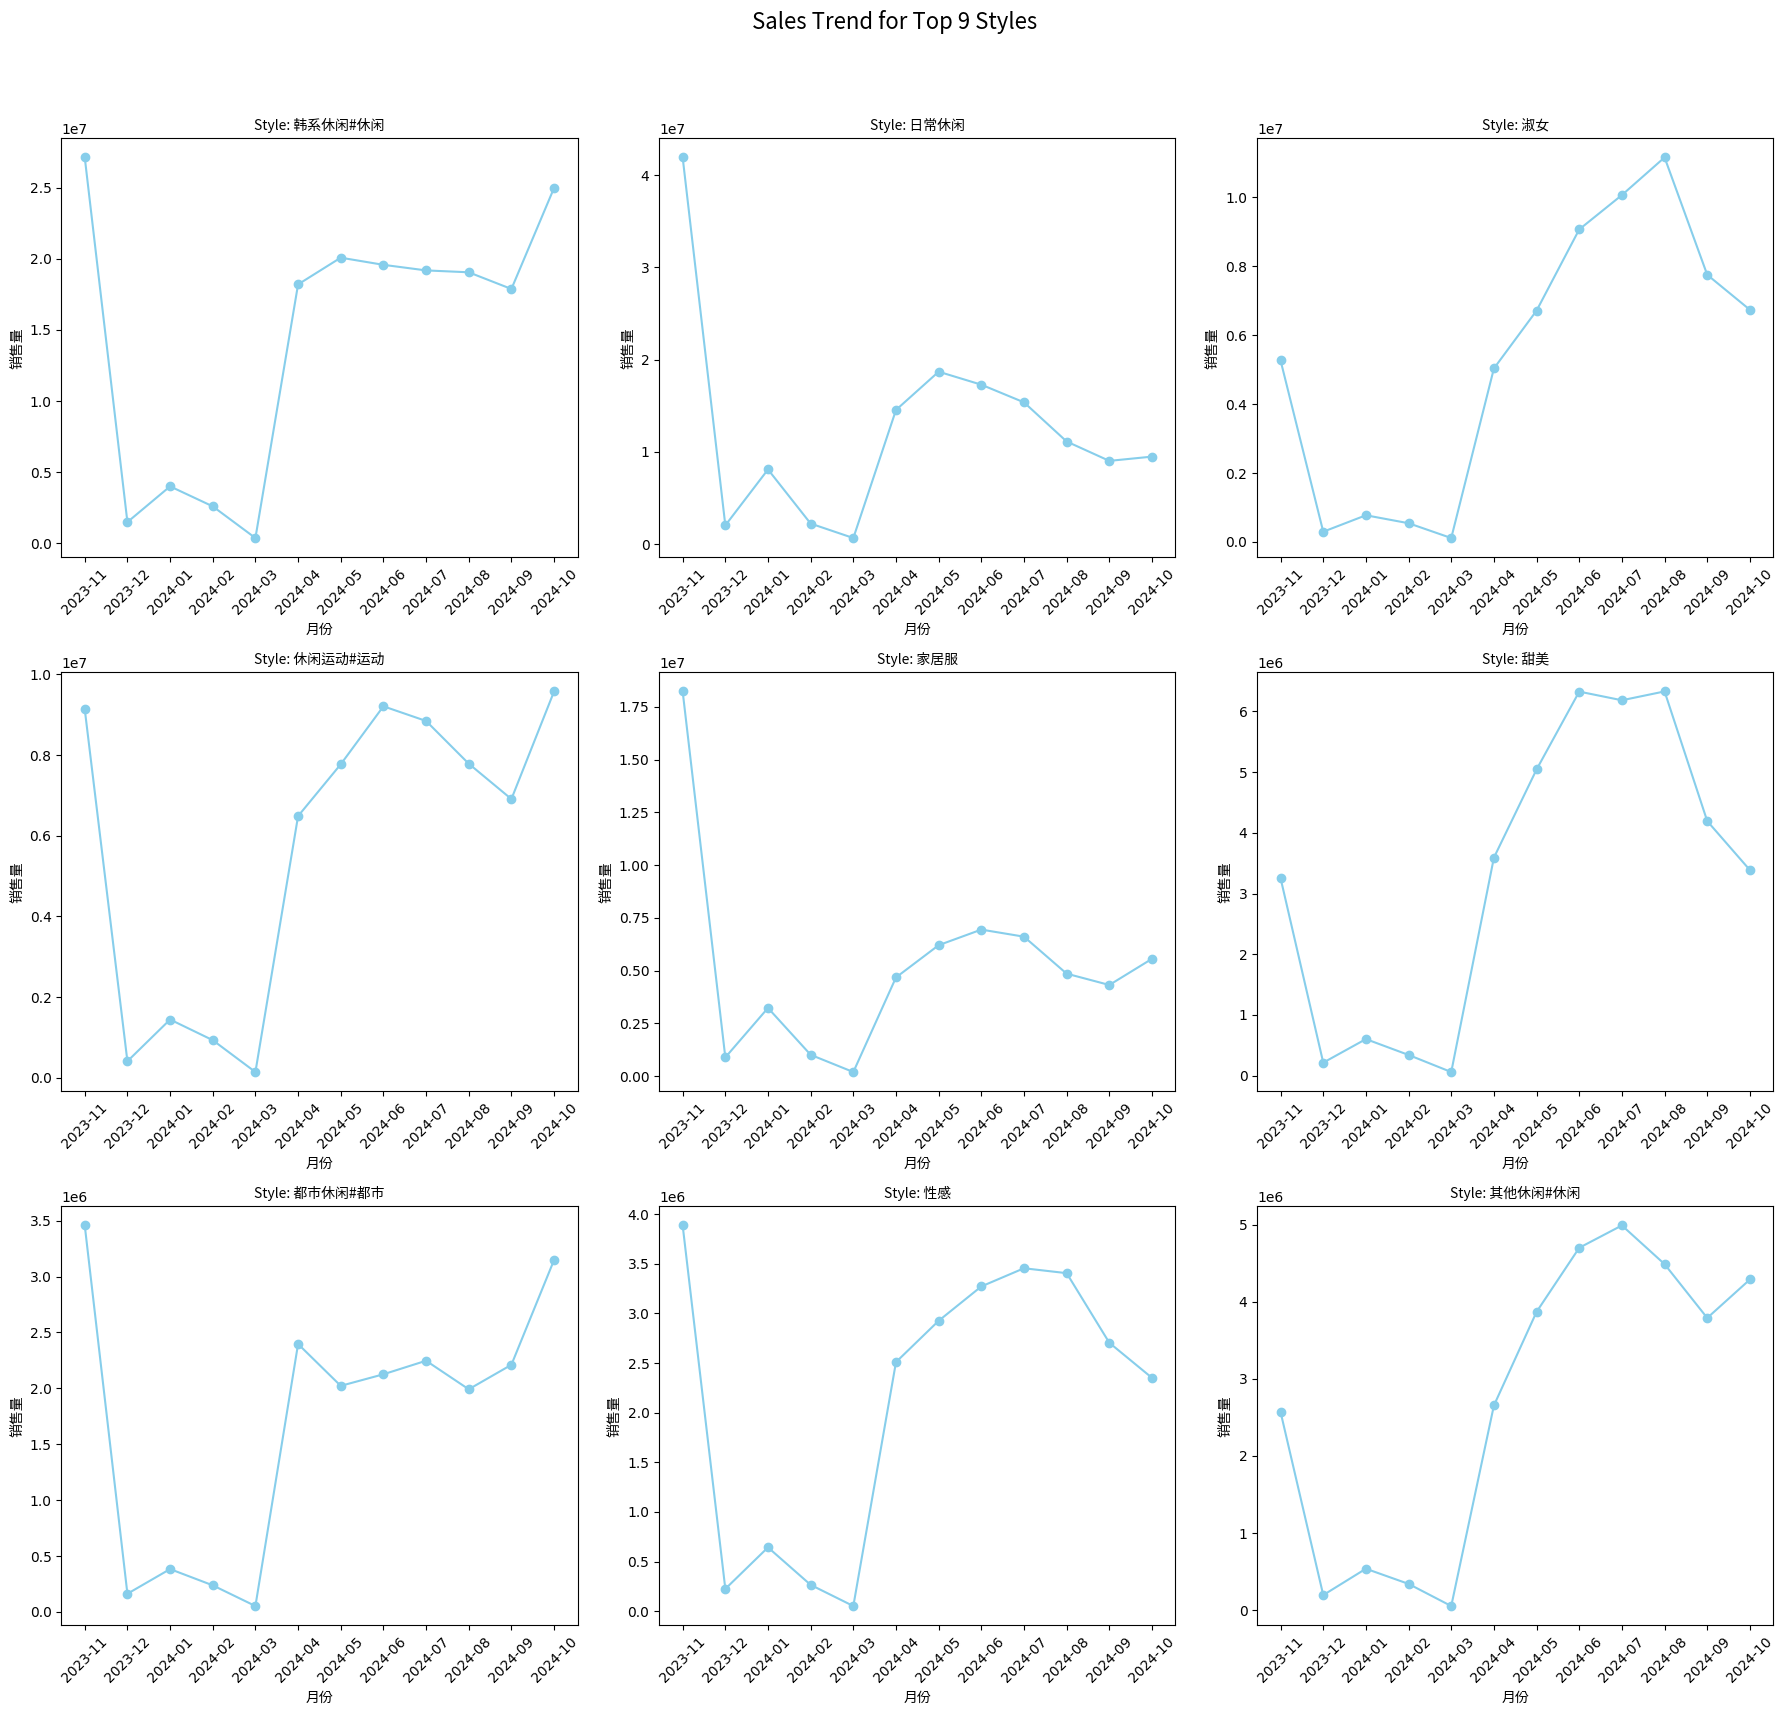

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载数据
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/tb_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 解析 pt 列，只提取月份
data['sale_month'] = pd.to_datetime(data['pt'], format='%Y%m%d').dt.to_period('M')

# 以 item_id、day_30_sales_volume 和 sale_month 为单位去重
unique_sales_data = data.drop_duplicates(subset=['item_id', 'day_30_sales_volume', 'sale_month'])

# 找到每个 style_new 中 unique union_id 数量最高的前 9 个风格
top_9_styles = data.groupby('style_new')['union_id'].nunique().nlargest(9).index
top_9_sales_data = unique_sales_data[unique_sales_data['style_new'].isin(top_9_styles)]

# 按 style_new 和 sale_month 聚合 day_30_sales_volume 的总和
monthly_sales = top_9_sales_data.groupby(['style_new', 'sale_month'])['day_30_sales_volume'].sum().reset_index()

# 加载中文字体
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# 定义时间范围：2023年11月至2024年10月
date_range = pd.period_range(start='2023-11', end='2024-10', freq='M')

# 创建一个包含 9 个子图的 3x3 布局大图
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Sales Trend for Top 9 Styles', fontproperties=chinese_font, fontsize=16)

# 绘制每个 style 的销售随月份变化的趋势图
for i, style in enumerate(top_9_styles):
    style_data = monthly_sales[monthly_sales['style_new'] == style]
    
    # Reindex to ensure all months are present, keeping 'sale_month' as a column
    style_data = style_data.set_index('sale_month').reindex(date_range, fill_value=0).rename_axis('sale_month').reset_index()

    # 选择对应的子图轴
    ax = axes[i // 3, i % 3]
    
    # 绘制每个 style 的销售趋势线
    ax.plot(style_data['sale_month'].astype(str), style_data['day_30_sales_volume'], marker='o', color='skyblue')
    ax.set_title(f'Style: {style}', fontproperties=chinese_font)
    ax.set_xlabel('月份', fontproperties=chinese_font)  # 'Month' in Chinese
    ax.set_ylabel('销售量', fontproperties=chinese_font)  # 'Sales' in Chinese
    ax.tick_params(axis='x', rotation=45)

# 调整布局并显示图表
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 为主标题留出空间
plt.show()
